In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, snoop, matplotlib, lux
import bamboolib as bam
from pprint import pprint as print

matplotlib.style.use("seaborn-whitegrid")
pd.set_option("display.width", 5000)
pd.set_option("display.max_columns", 60)
plt.rcParams["figure.figsize"] = (15, 10)

%load_ext snoop
%config InlineBackend.figure_format = 'retina'
# %config InlineBackend.figure_format = 'svg' 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

cred = {"host": 'localhost', 'dbname': 'yukontaf', 'user': 'glebsokolov', 'password': ''}
from sqlalchemy import create_engine
 
con = create_engine(
    f'postgresql://{cred["user"]}:{cred["password"]}@{cred["host"]}/{cred["dbname"]}'
)
 
 
def select(sql, con):
    with open(sql) as f:
        return pd.read_sql(f.read(), con)
    
import pandas as pd
df = pd.read_csv(r'/Users/glebsokolov/HeadRepo/Portfolio/nyse.csv', sep=',', decimal='.')
df['Total Revenue_pct_change'] = df.groupby(['Ticker Symbol'])['Total Revenue'].transform('pct_change')
df["Total Revenue_pct_change"] = (df['Total Revenue_pct_change'])*100
df

,Unnamed: 0,Ticker Symbol,Years,Period Ending,Total Revenue,Cost of Goods Sold,"Sales, General and Admin.",Research and Development,Other Operating Items,GICS Sector,GICS Sub Industry,Total Revenue_sum,Cost of Goods Sold_sum,"Sales, General and Admin._sum",Other Operating Items_sum,Research and Development_sum
0,0,AAL,Year 1,2012-12-31,24,10.000,12.977,NaN,0.845,Industrials,Airlines,132,47.000,67.851,4.357,0.000
1,1,AAL,Year 2,2013-12-31,26,11.000,12.913,NaN,0.853,Industrials,Airlines,132,47.000,67.851,4.357,0.000
2,2,AAL,Year 3,2014-12-31,42,15.000,20.686,NaN,1.295,Industrials,Airlines,132,47.000,67.851,4.357,0.000
3,3,AAL,Year 4,2015-12-31,40,11.000,21.275,NaN,1.364,Industrials,Airlines,132,47.000,67.851,4.357,0.000
4,4,AAP,Year 1,2012-12-29,6,3.000,2.441,NaN,NaN,Consumer Discretionary,Automotive Retail,30,16.000,12.231,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,1705,ZION,Year 4,2015-12-31,2,0.000,1.591,NaN,0.049,Financials,Regional Banks,8,0.000,6.525,-0.079,0.000
1706,1706,ZTS,Year 1,2013-12-31,4,1.000,1.613,0.399,0.060,Health Care,Pharmaceuticals,16,4.000,6.152,0.266,1.535
1707,1707,ZTS,Year 2,2014-12-31,4,1.000,1.643,0.396,0.060,Health Care,Pharmaceuticals,16,4.000,6.152,0.266,1.535
1708,1708,ZTS,Year 3,2015-12-31,4,1.000,1.532,0.364,0.061,Health Care,Pharmaceuticals,16,4.000,6.152,0.266,1.535


In [7]:
import pandas as pd
df = pd.read_csv(r'/Users/glebsokolov/HeadRepo/Portfolio/nyse.csv', sep=',', decimal='.')
df = df.drop(columns=['Unnamed: 0', 'level_0', 'index', 'Unnamed: 0.1'])
df["Cost Sold billions"] = df['Cost of Goods Sold']//10**9
df["Cost of Goods Sold"] = df['Cost of Goods Sold']//10**9
df["Sales, General and Admin."] = df['Sales, General and Admin.']/10**9
df["Research and Development"] = df['Research and Development']/10**9
df["Other Operating Items"] = df['Other Operating Items']/10**9
df = df.drop(columns=['Cost Sold billions'])
df['Period Ending'] = pd.to_datetime(df['Period Ending'], infer_datetime_format=True)
tmp_groupby_df = df.groupby(['Ticker Symbol']).agg({col: ['sum'] for col in ['Total Revenue', 'Cost of Goods Sold', 'Sales, General and Admin.', 'Other Operating Items', 'Research and Development']})
tmp_groupby_df.columns = ['_'.join(multi_index) for multi_index in tmp_groupby_df.columns.ravel()]
tmp_groupby_df = tmp_groupby_df.reset_index()
df = df.merge(tmp_groupby_df, on=['Ticker Symbol'])
df.to_csv('nyse.csv')

In [14]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.jars", "Users/glebsokolov/postgresql-42.3.3.jar") \
    .getOrCreate()

In [17]:
jdbcDF = spark.read \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://localhost:5432/yukontaf") \
    .option("dbtable", "public.airbnb") \
    .option("user", "glebsokolov") \
    .option("password", "") \
    .load()

df.printSchema()

Py4JJavaError: An error occurred while calling o123.load.
: java.sql.SQLException: No suitable driver
	at java.sql.DriverManager.getDriver(DriverManager.java:315)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCOptions.$anonfun$driverClass$2(JDBCOptions.scala:107)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCOptions.<init>(JDBCOptions.scala:107)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCOptions.<init>(JDBCOptions.scala:39)
	at org.apache.spark.sql.execution.datasources.jdbc.JdbcRelationProvider.createRelation(JdbcRelationProvider.scala:33)
	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:350)
	at org.apache.spark.sql.DataFrameReader.loadV1Source(DataFrameReader.scala:274)
	at org.apache.spark.sql.DataFrameReader.$anonfun$load$3(DataFrameReader.scala:245)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:245)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:174)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)


In [5]:
df = df.drop(columns=['Unnamed: 0', 'level_0', 'index', 'Unnamed: 0.1'])
df["Cost Sold billions"] = df['Cost of Goods Sold']//10**9
df["Cost of Goods Sold"] = df['Cost of Goods Sold']//10**9
df["Sales, General and Admin."] = df['Sales, General and Admin.']/10**9
df["Research and Development"] = df['Research and Development']/10**9
df["Other Operating Items"] = df['Other Operating Items']/10**9
df = df.drop(columns=['Cost Sold billions'])
df['Period Ending'] = pd.to_datetime(df['Period Ending'], infer_datetime_format=True)
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [12]:
pd.pivot_table(df, columns=['Ticker Symbol'], index=['Years'], values='Total Revenue').style

Ticker Symbol,AAL,AAP,AAPL,ABBV,ABC,ABT,ADBE,ADI,ADM,ADS,ADSK,AEE,AEP,AFL,AIG,AIV,AIZ,AKAM,ALB,ALK,ALL,ALLE,ALXN,AMAT,AME,AMGN,AMP,AMT,AMZN,AN,ANTM,APA,APC,APD,APH,ARNC,ATVI,AVGO,AVY,AWK,AXP,AYI,AZO,BA,BAC,BAX,BBBY,BBT,BBY,BCR,BDX,BHI,BIIB,BLL,BMY,BSX,BWA,BXP,CAG,CAH,CAT,CB,CBG,CCI,CCL,CELG,CERN,CF,CFG,CHD,CHK,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMG,CMI,CMS,CNC,CNP,COF,COG,COL,COO,COST,COTY,CPB,CRM,CSCO,CSRA,CSX,CTAS,CTL,CTSH,CTXS,CVS,CVX,CXO,D,DAL,DD,DE,DFS,DG,DGX,DHI,DHR,DIS,DISCA,DISCK,DLPH,DLR,DLTR,DNB,DOV,DPS,DRI,DUK,DVA,DVN,EA,EBAY,ECL,ED,EFX,EIX,EL,EMN,EMR,EOG,EQIX,EQR,EQT,ES,ESS,ETFC,ETN,ETR,EW,EXC,EXPD,EXPE,EXR,F,FAST,FB,FBHS,FCX,FDX,FE,FFIV,FIS,FISV,FL,FLIR,FLR,FLS,FMC,FRT,FSLR,FTR,GD,GGP,GILD,GIS,GLW,GM,GPC,GPN,GPS,GRMN,GT,GWW,HAL,HAR,HAS,HBAN,HBI,HCA,HCN,HCP,HD,HES,HIG,HOG,HOLX,HON,HP,HPE,HPQ,HRB,HRL,HRS,HSIC,HST,HSY,HUM,IBM,IDXX,IFF,ILMN,INTC,INTU,IP,IPG,IRM,ISRG,ITW,IVZ,JBHT,JEC,JNPR,JPM,JWN,K,KEY,KIM,KLAC,KMB,KMI,KMX,KO,KORS,KR,KSS,KSU,LB,LEG,LEN,LH,LKQ,LLL,LLTC,LLY,LMT,LNT,LOW,LRCX,LUK,LUV,LVLT,LYB,M,MA,MAA,MAC,MAR,MAS,MAT,MCD,MCHP,MCK,MCO,MDLZ,MET,MHK,MJN,MKC,MLM,MMC,MMM,MNST,MO,MON,MOS,MPC,MRK,MRO,MSFT,MTB,MTD,MU,MUR,MYL,NBL,NDAQ,NEE,NEM,NFLX,NFX,NKE,NLSN,NOV,NSC,NTAP,NUE,NVDA,NWL,O,OKE,OMC,ORLY,OXY,PBCT,PBI,PCAR,PCG,PCLN,PDCO,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKI,PM,PNC,PNR,PNW,PPG,PPL,PRU,PSX,PVH,PWR,PX,QCOM,QRVO,R,RCL,REGN,RHI,RHT,RL,ROK,ROP,ROST,RRC,RSG,SBUX,SCG,SE,SEE,SHW,SIG,SJM,SLG,SNA,SNI,SO,SPG,SPLS,SRCL,SRE,STI,STX,STZ,SWK,SWKS,SWN,SYF,SYK,SYMC,SYY,T,TAP,TDC,TDG,TEL,TGNA,TGT,TIF,TJX,TMK,TMO,TRIP,TRV,TSCO,TSN,TSO,TSS,TXN,TXT,UA,UAA,UAL,UDR,ULTA,UNH,UNM,UNP,UPS,URBN,USB,UTX,V,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAT,WDC,WEC,WFC,WFM,WHR,WM,WMB,WMT,WRK,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
Years,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Year 1,24.000000,6.000000,170.000000,18.000000,87.000000,19.000000,4.000000,2.000000,90.000000,3.000000,2.000000,5.000000,14.000000,25.000000,71.000000,0.000000,9.000000,1.000000,2.000000,4.000000,33.000000,2.000000,1.000000,7.000000,3.000000,18.000000,10.000000,2.000000,74.000000,17.000000,61.000000,16.000000,14.000000,10.000000,4.000000,23.000000,4.000000,6.000000,5.000000,2.000000,33.000000,2.000000,9.000000,86.000000,100.000000,13.000000,10.000000,10.000000,45.000000,3.000000,8.000000,22.000000,6.000000,8.000000,17.000000,7.000000,7.000000,1.000000,13.000000,101.000000,55.000000,17.000000,6.000000,2.000000,15.000000,6.000000,2.000000,6.000000,5.000000,2.000000,12.000000,11.000000,8.000000,29.000000,4.000000,17.000000,5.000000,2.000000,3.000000,17.000000,6.000000,8.000000,7.000000,23.000000,1.000000,4.000000,1.000000,105.000000,0.000000,8.000000,3.000000,48.000000,4.000000,12.000000,4.000000,18.000000,7.000000,2.000000,126.000000,230.000000,1.000000,12.000000,37.000000,28.000000,37.000000,8.000000,16.000000,7.000000,6.000000,18.000000,45.000000,5.000000,5.000000,15.000000,1.000000,7.000000,1.000000,7.000000,5.000000,5.000000,17.000000,8.000000,10.000000,3.000000,8.000000,11.000000,12.000000,2.000000,11.000000,10.000000,8.000000,24.000000,11.000000,1.000000,1.000000,1.000000,6.000000,0.000000,1.000000,16.000000,10.000000,1.000000,24.000000,5.000000,4.000000,0.000000,146.000000,3.000000,7.000000,3.000000,18.000000,44.000000,15.000000,1.000000,5.000000,4.000000,6.000000,1.000000,27.000000,4.000000,3.000000,0.000000,3.000000,5.000000,30.000000,2.000000,9.000000,17.000000,7.000000,155.000000,13.000000,2.000000,15.000000,2.000000,19.000000,8.000000,29.000000,4.000000,4.000000,3.000000,4.000000,33.000000,1.000000,2.000000,74.000000,12.000000,22.000000,5.000000,2.0

In [5]:
df = select("req.sql", con)


def replace_sign(x):
    if x == '$-': return np.nan
    else: return x


for col in df.columns:
    df[col] = df[col].apply(replace_sign)
    
df[' Total Revenue '] = df[' Total Revenue '].apply(lambda x: x//10**9)



In [ ]:
df.to_csv('nyse.csv')

In [17]:
df[cols[8]][1]

' $-   '

In [6]:
df = df.replace(df[cols[8]][1], np.nan)
df.to_sql('nyse_data', if_exists='replace', con=con)

NameError: name 'cols' is not defined

In [7]:

df.columns = [i.lstrip().rstrip() for i in df.columns]
df[df.columns[6]].apply(replace_sign)

0       24
1       26
2       42
3       40
4        6
        ..
1705     2
1706     4
1707     4
1708     4
1709     4
Name: Total Revenue, Length: 1710, dtype: int64

In [8]:
df.columns

Index(['level_0', 'index', 'Unnamed: 0', 'Ticker Symbol', 'Years', 'Period Ending', 'Total Revenue', 'Cost of Goods Sold', 'Sales, General and Admin.', 'Research and Development', 'Other Operating Items', 'GICS Sector', 'GICS Sub Industry'], dtype='object')

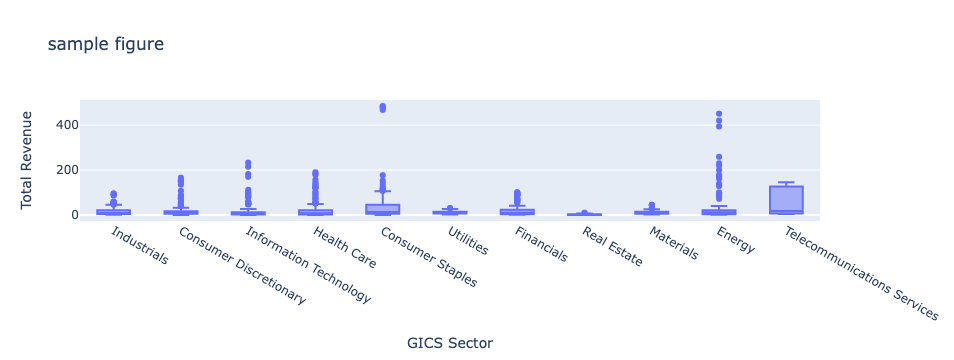

In [13]:
import plotly.express as px

fig = px.box(df, x='GICS Sector', y='Total Revenue', title="sample figure")
fig.show()


In [1]:
df['GICS Sector'].unique()

NameError: name 'df' is not defined